# Lecture 7: Sequence Alignment

CBIO (CSCI) 4835/6835: Introduction to Computational Biology

## Overview and Objectives

In our last lecture, we covered the basics of molecular biology and the role of sequence analysis. In this lecture, we'll dive deeper into how sequence analysis is performed and the role of algorithms in addressing sequence analysis. By the end of this lecture, you should be able to:

 - Define the notion of algorithmic complexity and how it relates to sequence alignment and analysis
 - Describe and define the abstract problems of shortest common superstring (SCS) and longest common substring (LCS), and how they specifically relate to sequence analysis
 - Recall different methods of scoring sequence alignments and their advantages and drawbacks
 - Describe the different distance metrics and methods of scoring sequence alignments
 - Explain why local or global sequence alignments are preferred in certain situations

## Part 0: `range`

This mysterious `range` function has showed up a few times so far. What does it do?

In [1]:
r = range(10)
print(r)

range(0, 10)


Not terribly useful output information, to be fair.

In [2]:
r = range(10)
l = list(r)  # cast it as a list
print(l)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


**`range(i)` generates a list of numbers from 0 (inclusive) to `i` (exclusive).** This is very useful for looping!

In [3]:
for i in range(10):
    print(i, end = " ")

0 1 2 3 4 5 6 7 8 9 

You can also provide a *second* argument to `range`, which specifies a *starting* point for the counting (other than 0). That starting point is still *inclusive*, and the ending point still *exclusive*.

In [4]:
for i in range(5, 10):
    print(i, end = " ")

5 6 7 8 9 

Finally, you can also provide a _third_ argument, which specifies the _interval_ between numbers in the output. So far, that interval has been 1: start at 0, to go `i`, by ones. You can change that "by ones" to whatever you want.

In [5]:
for i in range(5, 10, 2):  # read: from 5, to 10, by 2
    print(i)

5
7
9


You can get really crazy with this third one, if you want: you can go _backwards_ by putting in a negative interval.

In [6]:
for i in range(10, 0, -2): # from 10, to 0, by -2
    print(i)

10
8
6
4
2


Same rules apply, though: the starting point is _inclusive_ (hence why we see a 10), and the ending point is _exclusive_ (hence why we _don't_ see a 0).

`range` is particularly useful as a way of looping through a list of items _by index_.

In [7]:
list_of_interesting_things = [93, 17, 5583, 47, 2359875, 4, 381]
for item in list_of_interesting_things:
    print(item, end = " ")

93 17 5583 47 2359875 4 381 

This is how we've seen loops so far: the loop variable (here it's `item`) is a literal item in the list. **But what if, in addition to the item, I needed to know _where_ in the list that item was** (i.e., the item's list index)?

In [8]:
list_length = len(list_of_interesting_things)
for index in range(list_length):  # use range of the list length!
    item = list_of_interesting_things[index]  # pull out the item AT that index
    print("Item " + str(item) + " at index " + str(index))

Item 93 at index 0
Item 17 at index 1
Item 5583 at index 2
Item 47 at index 3
Item 2359875 at index 4
Item 4 at index 5
Item 381 at index 6


## Part 1: Complexity

![bigoh](SequenceAlignment/bigO.png)

### Big "Oh" Notation

From computer science comes this notion: how the runtime of an algorithm changes with respect to its input size.

$\mathcal{O}(n)$ - the "$\mathcal{O}$" is short for "order of the function", and the value inside the parentheses is always with respect to $n$, interpreted to be the variable representing the size of the input data.

### Limits

Big-oh notation is a representation of limits, and most often we are interested in "worst-case" runtime. Let's start with the example from the last lecture.

In [9]:
a = [1, 2, 3, 4, 5]
for element in a:
    print(element)

1
2
3
4
5


How many steps, or iterations, does this loop require to run?

Alright, back to complexity:

In [10]:
a = range(100)
for element in a:
    print(element, end = " ")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

How many iterations does this loop require?

**For iterating once over any list using a single `for` loop, how many iterations does this require?**

Algorithms which take $n$ iterations to run, where $n$ is the number of elements in our data set, are referred to as running in $\mathcal{O}(n)$ time.

This is roughly interpreted to mean that, for $n$ data points, $n$ processing steps are required.

**Important to note**: we never actually specify *how much time* a single processing step is. It could be a femtosecond, or an hour. Ultimately, it doesn't matter. What does matter when something is $\mathcal{O}(n)$ is that, if we add one more data point ($n + 1$), then however long a single processing step is, the algorithm should take only that much longer to run.

How about this code? What is its big-oh?

In [11]:
a = range(100)
b = range(1, 101)
for i in a:
    print(a[i] * b[i], end = " ")

0 2 6 12 20 30 42 56 72 90 110 132 156 182 210 240 272 306 342 380 420 462 506 552 600 650 702 756 812 870 930 992 1056 1122 1190 1260 1332 1406 1482 1560 1640 1722 1806 1892 1980 2070 2162 2256 2352 2450 2550 2652 2756 2862 2970 3080 3192 3306 3422 3540 3660 3782 3906 4032 4160 4290 4422 4556 4692 4830 4970 5112 5256 5402 5550 5700 5852 6006 6162 6320 6480 6642 6806 6972 7140 7310 7482 7656 7832 8010 8190 8372 8556 8742 8930 9120 9312 9506 9702 9900 

**Still $\mathcal{O}(n)$**. The important part is not (directly) the number of lists, but rather how we operate on them: again, we're using **only 1 `for` loop**, so our runtime is directly proportional to how long the lists are.

How about this code?

In [12]:
a = range(100)
x = []
for i in a:
    x.append(i ** 2)

for j in a:
    x.append(j ** 2)

**Trick question!** One loop, as we've seen, is $\mathcal{O}(n)$. Now we've written a second loop that is also $\mathcal{O}(n)$, so literally speaking the runtime is $2*\mathcal{O}(n)$, but what happens to the 2 in the limit as $n \rightarrow \infty$?

**The 2 is insignificant**, so the overall big-oh for this code is still $\mathcal{O}(n)$.

How about this code?

In [13]:
a = range(100)
for element_i in a:
    for element_j in a:
        print(element_i * element_j, end = " ")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 0 2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94 96 98 100 102 104 106 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194 196 198 0 3 6 9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57 60 63 66 69 72 75 78 81 84 87 90 93 96 99 102 105 108 111 114 117 120 123 126 129 132 135 138 141 144 147 150

338 364 390 416 442 468 494 520 546 572 598 624 650 676 702 728 754 780 806 832 858 884 910 936 962 988 1014 1040 1066 1092 1118 1144 1170 1196 1222 1248 1274 1300 1326 1352 1378 1404 1430 1456 1482 1508 1534 1560 1586 1612 1638 1664 1690 1716 1742 1768 1794 1820 1846 1872 1898 1924 1950 1976 2002 2028 2054 2080 2106 2132 2158 2184 2210 2236 2262 2288 2314 2340 2366 2392 2418 2444 2470 2496 2522 2548 2574 0 27 54 81 108 135 162 189 216 243 270 297 324 351 378 405 432 459 486 513 540 567 594 621 648 675 702 729 756 783 810 837 864 891 918 945 972 999 1026 1053 1080 1107 1134 1161 1188 1215 1242 1269 1296 1323 1350 1377 1404 1431 1458 1485 1512 1539 1566 1593 1620 1647 1674 1701 1728 1755 1782 1809 1836 1863 1890 1917 1944 1971 1998 2025 2052 2079 2106 2133 2160 2187 2214 2241 2268 2295 2322 2349 2376 2403 2430 2457 2484 2511 2538 2565 2592 2619 2646 2673 0 28 56 84 112 140 168 196 224 252 280 308 336 364 392 420 448 476 504 532 560 588 616 644 672 700 728 756 784 812 840 868 896 924 952

 180 225 270 315 360 405 450 495 540 585 630 675 720 765 810 855 900 945 990 1035 1080 1125 1170 1215 1260 1305 1350 1395 1440 1485 1530 1575 1620 1665 1710 1755 1800 1845 1890 1935 1980 2025 2070 2115 2160 2205 2250 2295 2340 2385 2430 2475 2520 2565 2610 2655 2700 2745 2790 2835 2880 2925 2970 3015 3060 3105 3150 3195 3240 3285 3330 3375 3420 3465 3510 3555 3600 3645 3690 3735 3780 3825 3870 3915 3960 4005 4050 4095 4140 4185 4230 4275 4320 4365 4410 4455 0 46 92 138 184 230 276 322 368 414 460 506 552 598 644 690 736 782 828 874 920 966 1012 1058 1104 1150 1196 1242 1288 1334 1380 1426 1472 1518 1564 1610 1656 1702 1748 1794 1840 1886 1932 1978 2024 2070 2116 2162 2208 2254 2300 2346 2392 2438 2484 2530 2576 2622 2668 2714 2760 2806 2852 2898 2944 2990 3036 3082 3128 3174 3220 3266 3312 3358 3404 3450 3496 3542 3588 3634 3680 3726 3772 3818 3864 3910 3956 4002 4048 4094 4140 4186 4232 4278 4324 4370 4416 4462 4508 4554 0 47 94 141 188 235 282 329 376 423 470 517 564 611 658 705 752 

 6076 6138 0 63 126 189 252 315 378 441 504 567 630 693 756 819 882 945 1008 1071 1134 1197 1260 1323 1386 1449 1512 1575 1638 1701 1764 1827 1890 1953 2016 2079 2142 2205 2268 2331 2394 2457 2520 2583 2646 2709 2772 2835 2898 2961 3024 3087 3150 3213 3276 3339 3402 3465 3528 3591 3654 3717 3780 3843 3906 3969 4032 4095 4158 4221 4284 4347 4410 4473 4536 4599 4662 4725 4788 4851 4914 4977 5040 5103 5166 5229 5292 5355 5418 5481 5544 5607 5670 5733 5796 5859 5922 5985 6048 6111 6174 6237 0 64 128 192 256 320 384 448 512 576 640 704 768 832 896 960 1024 1088 1152 1216 1280 1344 1408 1472 1536 1600 1664 1728 1792 1856 1920 1984 2048 2112 2176 2240 2304 2368 2432 2496 2560 2624 2688 2752 2816 2880 2944 3008 3072 3136 3200 3264 3328 3392 3456 3520 3584 3648 3712 3776 3840 3904 3968 4032 4096 4160 4224 4288 4352 4416 4480 4544 4608 4672 4736 4800 4864 4928 4992 5056 5120 5184 5248 5312 5376 5440 5504 5568 5632 5696 5760 5824 5888 5952 6016 6080 6144 6208 6272 6336 0 65 130 195 260 325 390 45

5103 5184 5265 5346 5427 5508 5589 5670 5751 5832 5913 5994 6075 6156 6237 6318 6399 6480 6561 6642 6723 6804 6885 6966 7047 7128 7209 7290 7371 7452 7533 7614 7695 7776 7857 7938 8019 0 82 164 246 328 410 492 574 656 738 820 902 984 1066 1148 1230 1312 1394 1476 1558 1640 1722 1804 1886 1968 2050 2132 2214 2296 2378 2460 2542 2624 2706 2788 2870 2952 3034 3116 3198 3280 3362 3444 3526 3608 3690 3772 3854 3936 4018 4100 4182 4264 4346 4428 4510 4592 4674 4756 4838 4920 5002 5084 5166 5248 5330 5412 5494 5576 5658 5740 5822 5904 5986 6068 6150 6232 6314 6396 6478 6560 6642 6724 6806 6888 6970 7052 7134 7216 7298 7380 7462 7544 7626 7708 7790 7872 7954 8036 8118 0 83 166 249 332 415 498 581 664 747 830 913 996 1079 1162 1245 1328 1411 1494 1577 1660 1743 1826 1909 1992 2075 2158 2241 2324 2407 2490 2573 2656 2739 2822 2905 2988 3071 3154 3237 3320 3403 3486 3569 3652 3735 3818 3901 3984 4067 4150 4233 4316 4399 4482 4565 4648 4731 4814 4897 4980 5063 5146 5229 5312 5395 5478 5561 5644 57

Nested `for` loops are brutal--the inner loop runs in its entirety for every single iteration of the outer loop. In the limit, for a list of length $n$, there are $\mathcal{O}(n^2)$ iterations.

One more tricky one:

In [14]:
xeno = 100
while xeno > 1:
    xeno /= 2
    print(xeno, end = " ")

50.0 25.0 12.5 6.25 3.125 1.5625 0.78125 

Maybe another example from the same complexity class:

In [15]:
xeno = 100000
while xeno > 1:
    xeno /= 10
    print(xeno, end = " ")

10000.0 1000.0 100.0 10.0 1.0 

What does this "look" like?

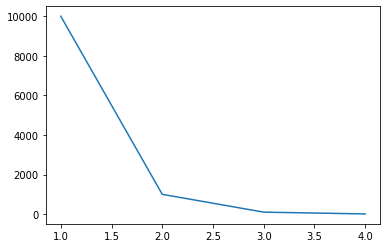

In [16]:
# I'm just plotting the iteration number against the value of "xeno".

%matplotlib inline
import matplotlib.pyplot as plt

x = []
y = []
xeno = 10000
i = 1
while xeno > 1:
    x.append(i)
    y.append(xeno)
    xeno /= 10
    i += 1
plt.plot(x, y)

In the first one, on each iteration, we're dividing the remaining space by 2, halving again and again and again.

In the second one, on each iteration, we're dividing the space by 10.

**$\mathcal{O}(\log n)$**. We use the default (base 10) because, in the limit, constants don't matter.

## Part 2: SCS and LCS

Recall from the last lecture what SCS (shortest common superstring) was:

 - The shortest common superstring, given sequences $X$ and $Y$, is the shortest possible sequence that contains all the sequences $X$ and $Y$.

For example, let's say we have $X$ = `ABACBDCAB` and $Y$ = `BDCABA`. What would be the shortest common superstring?

Here is one alignment: `BDC`**`ABA`** (second string) and **`ABA`**`CBDCAB` (first string). The `ABA` is where the two strings overlap. The full alignment, `BDCABACBDCAB`, has a length of 12.

Can we do better?

`ABAC`**`BDCAB`** and **`BDCAB`**A, which gives a full alignment of `ABACBDCABA`, which has a length of only 10. So this alignment would be the SCS.

(When do we need to use SCS?)

### Longest Common Substring (LCS)

In a related, but different, problem: longest common substring asks:

 - Given sequences $X$ and $Y$, the longest common substring is the constituent of the sequences $X$ and $Y$ that is as long as possible.

Let's go back to our sequences from before: $X$ = `ABACBDCAB` and $Y$ = `BDCABA`. What would be the longest common substring?

The easiest substrings are the single characters `A`, `B`, `C`, and `D`, which both $X$ and $Y$ have. But these are short: only length 1 for all. Can we do better?

`ABAC`**`BDCAB`** and **`BDCAB`**A, so the longest common substring is `BDCAB`.

(When do we need LCS?)

### Rudimentary Sequence Alignment

Given two DNA sequences $v$ and $w$:

$v$: `ATATATAT`

$w$: `TATATATA`

How would you suggest aligning these sequences to determine their similarity?

**Before we try to align them, we need some objective measure of what a "good" alignment is!**

## Part 3: Distance Metrics

Hopefully, everyone has heard of *Euclidean distance*: this is the usual "distance" formula you use when trying to find out how far apart two points are in 2D space.

How is it computed?

For two points in 2D space, $a$ and $b$, their Euclidean distance $d_e(a, b)$ is defined as:

$d_e(a, b) = \sqrt{(a_x - b_x)^2 + (a_y - b_y)^2)}$

So if $a = (1, 2)$ and $b = (5, 3)$, then:

$d_e(a, b) = \sqrt{(1 - 5)^2 + (2 - 3)^2} = \sqrt{(-4)^2 + (-1)^2} = \sqrt{16 + 1} = 4.1231$

How can we measure distance between two sequences?

There is a metric called **Hamming Distance**, which counts number of differing corresponding elements in two strings.

We'll represent the Hamming distance between two strings $v$ and $w$ as $d_H(v, w)$.

$v$: `ATATATAT`

$w$: `TATATATA`

$d_H(v, w)$ = 8

That seems reasonable. But, given how similar the two sequences are (after all, the LCS of these two is 7 characters), what if we shifted one of the sequences over by one space?

$v$: `ATATATAT-`

$w$: `-TATATATA`

Now, what's $d_H(v, w)$?

$d_H(v, w)$ = 2

The only elements of the two strings that don't overlap are the first and last; they match perfectly otherwise!

### Edit distance

Hamming distance is useful, but it neglects the possibility of insertions and deletions in DNA (what is the only thing it counts?). So we need something more robust.

The *edit distance* between two strings is the *minimum number of elementary operations* (insertions, deletions, or substitutions / mutations) required to transform one string into the other.

**Hamming distance**: $i^{th}$ letter of $v$ with $i^{th}$ letter of $w$ (how hard is this to do?)

**Edit distance**: $i^{th}$ letter of $v$ with $j^{th}$ letter of $w$ (how hard is this to do?)

Hamming distance is easy, but gives us the wrong answers. Edit distance gives us much better answers, but it's hard to compute: **how do we know which $i$ to pair with which $j$?**

What's the edit distance for $v$ = `TGCATAT` and $w$ = `ATCCGAT`?

One solution:

 1. TGCATA**T** (delete last T)
 2. TGCAT**A** (delete last A)
 3. **A**TGCAT (insert A at front)
 4. AT**C**CAT (mutate G to C)
 5. ATCC**G**AT (insert G before last A)
 
`ATCCGAT` == `ATCCGAT`, done in 5 steps! 

**Can it be done in 4 steps?**

(...mmmmaybe--but that's for next week!)

## Part 4: Global vs Local Alignment

![dnasequence](SequenceAlignment/dnasequence.png)

*indel* is a portmanteau of "insertion" and "deletion", so we don't need to worry about which strand we're actually referring to.

**What is the edit distance here?**

### Highly conserved subsequences

Things get hairier when we consider that two genes in different species may be similar over **short, conserved regions** and dissimilar over remaining regions.

Homeobox regions have a short region called the *homeodomain* that is highly conserved among species--responsible for regulation of patterns of anatomical development in animals, fungi, and plants.

![homeobox](SequenceAlignment/homeobox.png)

 - A global alignment would not find the homeodomain because it would try to align the *entire* sequence.
 - Therefore, we search for an alignment which has a low edit score *locally*, meaning we have to search aligned substrings of the two sequences.

Here's an example global alignment that minimizes edit distance over the entirety of these two sequences:

![global](SequenceAlignment/global.png)

Here's an example local alignment that may have an *overall larger edit distance*, but it finds the highly conserved substring:

![local](SequenceAlignment/local.png)

"BUT!", you protest.

"If the local alignment has a higher edit score, how do we find it at all?"

We've already seen that we need to consider three separate possibilities when aligning sequences:

 1. Insertions / Deletions (characters added or removed)
 2. Mutations / Substitutions (characters modified)
 3. Matches (characters align)

With Hamming distance, two characters were either the same or they weren't (options 1 and 2 above were a single criterion).

With edit distance, we separated #1 and #2 above into their own categories, but they are still weighted the same (1 insertion = 1 mutation = 1 edit)

**Are all insertions / deletions created equal? How about all substitutions?**

### Scoring Matrices

Say we want to align the sequences:

$v$ = `AGTCA`

$w$ = `CGTTGG`

But instead of using a standard edit distance as before, I give you the following *scoring matrix*:

![dnascoring](SequenceAlignment/dnascoring.png)

This matrix gives the specific edit penalties for particular substitutions / insertions / deletions.

It also allows us to codify our understanding of biology and biochemistry into how we define a "good" alignment. For instance, this penalizes matching A with G more heavily than C matched with T.

Here is a sample alignment using this scoring matrix:

![samplealignment](SequenceAlignment/samplealignment.png)

### Making a scoring matrix

Scoring matrices are created based on biological evidence.

Some mutations, especially in amino acid sequences, may have little (if any!) effect on the protein's function. Using scoring matrices, we can directly quantify that understanding.

 - Polar to polar mutations (aspartate -> glutamate)
 - Nonpolar to nonpolar mutations (alanine -> valine)
 - Similarly behaving residues (leucine -> isoleucine)

### Standard scoring matrices

For nucleotide sequences, there aren't really "standard" scoring matrices, since DNA is less conserved overall and less effective to compare coding regions.

There are, however, some common amino acid scoring matrices. We'll discuss two:

 1. PAM (**P**oint **A**ccepted **M**utation)
 2. BLOSUM (**Blo**cks **Su**bstitution **M**atrix)

### PAM

PAM is a more theoretical model of amino acid substitutions.

It is always associated with a number, e.g. 1 PAM, written as PAM$_1$. This means the given PAM$_1$ scoring matrix is built to reflect a **1% average change in all amino acid positions** of the polypeptide, according to evolution.

Some important notes:
 - This is an *average*. Even with PAM$_{100}$, not every residue will have changed (some are more conserved than others)
 - Some residues may have mutated several times!
 - Some residues may have mutated back to their original state!
 - Some residues may not have changed at all

PAM$_{250}$ is a widely used scoring matrix.

![pam250](SequenceAlignment/pam250.png)

Mutating A to A is clearly the most preferable (highest score in that row of 13 points), but after 250 evolutions, a mutation from A to G also seems very favorable (12 points).

### BLOSUM

Unlike PAM, scores in BLOSUM are derived from direct empirical observations of the frequencies of substitutions in blocks of local alignments in related proteins. They both, however, often obtain identical alignment scores.

Like PAM, BLOSUM also has a number associated with it, this time to represent the observed substitution rate between two proteins sharing some amount of similarity.

BLOSUM$_{62}$ is a common scoring matrix, representing substitution rates in proteins sharing no more than 62% identity.

![blosum62](SequenceAlignment/blosum62.png)

## Next week

We'll look at how to use these matrices to determine the best alignments of sequences!

## Administrivia

 - **You should everything you need now for Assignment 2.** Any questions so far? Due next week!

## Additional Resources

 1. Jones, Neil C. and Pevzner, Pavel A. *An Introduction to Bioinformatics Algorithms*, Chapter 6. 2004. ISBN-13: 978-0262101066
 2. Based heavily on the [modified slides of Dr. Phillip Compeau](http://compeau.cbd.cmu.edu/teaching/jones-pevzner-slides/sequence-alignment/).